# Chatbot basés sur la récupération (Retrieval Based chatbot)

##### Importation des librairies necessaires

In [1]:
import io
import random
import string # pour traiter des chaînes standard en python
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer

In [2]:
# importation de la base de données
with open('database.txt','r', encoding='utf8', errors ='ignore') as fin:
    raw = fin.read().lower()

### 1.Prétraitement des données (Data Pre-Processing)
Nous devons diviser notre texte en phrases et en mots, car la similarité en cosinus de l'entrée de l'utilisateur sera comparée à chaque phrase.

In [3]:
#Tokenisation
sent_tokens = nltk.sent_tokenize(raw)# convertit en liste de phrases
words_tokens = nltk.word_tokenize(raw)# convertit en liste de mots

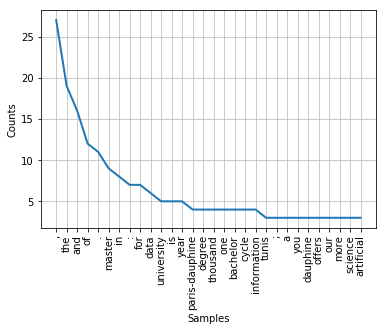

In [5]:
fd = nltk.FreqDist(words_tokens)
fd.plot(30,cumulative=False)

In [6]:
word_tokens=[]
stop=["the","and","if","in","is","for","of","we"]
for w in words_tokens:
    if w not in stop :
        word_tokens.append(w)

nous définissons une fonction LemTokens, qui prend une liste de mots en entrée et la lemmatise. 

La liste remove_punct_dict supprime la ponctuation du texte transmis. 
Enfin, 
la méthode LemNormalize prend une phrase en entrée, la tokenise, la lemmatise, puis supprime la ponctuation de la phrase.

In [7]:
lemmer = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

Nous devons gérer différents types d'entrées utilisateur de manière différente. Par exemple, pour les salutations, nous allons définir une fonction dédiée. Pour gérer les salutations,

In [8]:
# Keyword Matching
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey")
GREETING_RESPONSES = ["hi", "hey", "hi there", "hello", "I am glad! You are talking to me"]

def greeting(sentence):
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

### 2.Génération des réponses (TF-IDF Approach)

La réponse sera basée sur la similarité de la forme vectorielle de la phrase d'entrée et des phrases dans les corpus.
Le script suivant importe les fonctions: TfidfVectorizer et cosine_similarity

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Nous avons maintenant tout mis en place pour générer une réponse aux questions des utilisateurs.
Nous allons créer une méthode qui prend l’entrée de l’utilisateur, trouve la similarité en cosinus de l’entrée de l’utilisateur et la compare aux phrases du corpus.

In [10]:
def response(user_input):
    Delphi_response=''
    sent_tokens.append(user_input)
    
    word_vectorizer = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    all_word_vectors = word_vectorizer.fit_transform(sent_tokens)  
    similar_vector_values = cosine_similarity(all_word_vectors[-1], all_word_vectors)
    idx=similar_vector_values.argsort()[0][-2]
    
    matched_vector = similar_vector_values.flatten()
    matched_vector.sort()
    vector_matched = matched_vector[-2]
   
    if(vector_matched==0):
        Delphi_response=Delphi_response+"I am sorry! I don't understand you, contact us for more information"
        return Delphi_response
    else:
        Delphi_response = Delphi_response+sent_tokens[idx]
        return Delphi_response


* Nous ajoutons l'entrée de l'utilisateur à la liste des phrases existantes.
* Nous initialisons le tfidfvectorizer puis convertissons toutes les phrases du corpus ainsi que la phrase entrée dans leur forme vectorisée correspondante.
* Nous utilisons la fonction cosine_similarity pour trouver la similarité cosinus entre le dernier élément de la liste all_word_vectors (qui est en fait la question de l'utilisateur) et les vecteurs pour toutes les phrases du corpus.

* Nous trions la liste contenant les similitudes de cosinus des vecteurs, l’avant-dernier élément de la liste aura le cosinus le plus élevé (après tri) avec l’entrée utilisateur. Le dernier élément est la saisie de l'utilisateur lui-même, nous ne l'avons donc pas sélectionnée.

* Enfin, nous aplatissons la similarité de cosinus récupérée et vérifions si la similarité est égale à zéro ou non. Si la similarité cosinus du vecteur correspondant est 0, cela signifie que notre requête n'a pas de réponse. Dans ce cas, nous indiquerons simplement que nous ne comprenons pas la requête de l'utilisateur.

* Sinon, si la similarité du cosinus n'est pas égale à zéro, cela signifie que nous avons trouvé une phrase similaire à l'entrée de notre corpus. Dans ce cas, nous allons simplement passer l'index de la phrase correspondante à notre liste "sent_tokens" qui contient la collection de toutes les phrases.


### 3. Discuter avec le Chatbot

* Enfin, nous devons créer une fonction nous permettant de discuter avec le chatbot. Pour ce faire, nous allons écrire une autre fonction d'assistance qui continuera à s'exécuter jusqu'à ce que l'utilisateur tape "Bye".

* Nous imprimons un message de bienvenue à l'utilisateur pour lui demander toute entrée. Ensuite, nous initialisons une boucle while qui continue à s'exécuter jusqu'à ce que l'indicateur de dialogue continue_dialogue soit False.

* À l'intérieur de la boucle, une entrée utilisateur est reçue, qui est ensuite convertie en minuscule. L'entrée utilisateur est stockée dans la variable user_response. Si l'utilisateur entre le mot "bye", le continue_dialogue est défini sur false et le message d'adieu est imprimé à l'utilisateur.


* Dès que la réponse est générée, l'entrée utilisateur est supprimée de la collection de phrases (data base),
* Le processus se poursuit jusqu'à ce que l'utilisateur tape "bye".

In [ ]:
continue_dialogue=True
print('\n\n')
print("==========Delphi==========")
print("You can speak to me by typing in English.")
print('Enter "Bye" to quit')
print('='*26)
print("Hello. I am Delphi, and i represent Tunis Dauphine University, how can i help you?")
#speak("Hello. I am Delphi, and i represent Tunis Dauphine University, how can i help you?")


while(continue_dialogue==True):
    user_input = input()
    user_input=user_input.lower()
    if(user_input!='bye'):
        if(user_input=='thanks' or user_input=='thank you' ):
            print("Delphi: You are welcome..")
            
        else:
            if(greeting(user_input)!=None):
                tmp=greeting(user_input)
                print("Delphi: "+tmp)
            else:
                print("Delphi: ",end="")
                temp=response(user_input)
                print(temp)  
                sent_tokens.remove(user_input)
                

    else:
        continue_dialogue=False
        print("Delphi: Goodbye, For any inquiries, you can contact either:")
        print("by email: candidature@dauphine.tn")
        print("by phone: +216 98 199 584")
        print("by messenger: University Paris-Dauphine | Tunis")
        print("By going to the admission service directly on campus")   





==========Delphi==========
You can speak to me by typing in English.
Enter "Bye" to quit
Hello. I am Delphi, and i represent Tunis Dauphine University, how can i help you?
